In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# read in our data
landslides = pd.read_csv("catalog.csv")
landslides.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


In [2]:
print(landslides['date'].head())  # checking for the date format

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object


Given the output above, we can assume that Python does not treat the date values as actual dates as the data type associated with them is "object", something that is usually used for strings.

We can also check the data type of a particular column like this -

In [ ]:
landslides.date.dtype  # dtype('0') refers to data type "object"

dtype('O')

Thus, we need to convert the unrecognised date information into actual date data type. We can do so using the `.to_datetime()` method that is part of the pandas library built specially for this purpose -

In [4]:
landslides['date_parsed'] = pd.to_datetime(landslides['date'], format="%m/%d/%y")
landslides.date_parsed.head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]

If there are multiple date formats used in the same column, the format parameter will cause the program to lead to errors. In order to minimise the risk of errors and improve generality, we can have Pandas try to figure out what the right date is using the `infer_datetime_format=True` parameter -

In [5]:
landslides['date_parsed'] = pd.to_datetime(landslides['date'], infer_datetime_format=True)
landslides.date_parsed.head()

C:\Users\Atharv Rawat\AppData\Local\Temp\ipykernel_10856\4068570658.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  landslides['date_parsed'] = pd.to_datetime(landslides['date'], infer_datetime_format=True)
C:\Users\Atharv Rawat\AppData\Local\Temp\ipykernel_10856\4068570658.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  landslides['date_parsed'] = pd.to_datetime(landslides['date'], infer_datetime_format=True)


0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]

The method above is not recommended because -
 - It is deprecated.
 - It is unreliable.
 - Much slower comppared to hardcoding the date format.

In [6]:
day_of_month_landslides = landslides['date_parsed'].dt.day
day_of_month_landslides.head()

0     2.0
1    22.0
2     6.0
3    14.0
4    15.0
Name: date_parsed, dtype: float64

<Axes: xlabel='date_parsed', ylabel='Count'>

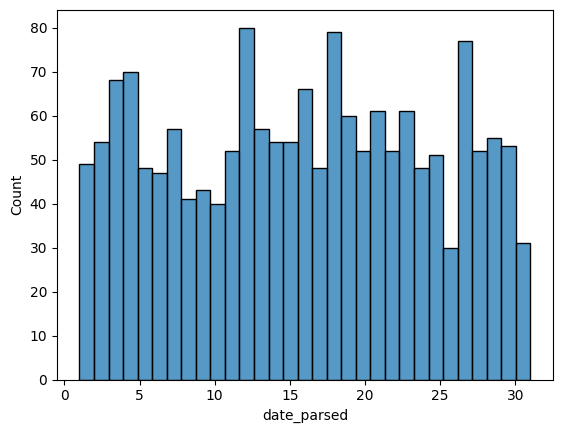

In [ ]:
day_of_month_landslides = day_of_month_landslides.dropna()

# plot the day of the month
sns.histplot(data=day_of_month_landslides, kde=False, bins=31)